In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

## Extract

In [2]:
df = pd.read_csv('CCEE_BR_Data_original_edited.csv', encoding='UTF-8')

In [3]:
df

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
0,01/07/2018,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01,0
1,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE/CENTRO-OESTE,MG,0.00,0
2,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE/CENTRO-OESTE,MT,0.68,0
3,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,SC,1.88,0
4,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.04,0
...,...,...,...,...,...,...,...
418606,19/06/2020,Distribuidor,ACR,SUDESTE/CENTRO-OESTE,DF,689.19,1
418607,19/06/2020,Distribuidor,ACR,SUDESTE/CENTRO-OESTE,AC,121.34,1
418608,19/06/2020,Distribuidor,ACR,SUL,SC,2012.83,1
418609,19/06/2020,Distribuidor,ACR,SUL,RS,2310.67,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418611 entries, 0 to 418610
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Data        418611 non-null  object 
 1   Classe      418611 non-null  object 
 2   Ramo        418611 non-null  object 
 3   Submercado  418611 non-null  object 
 4   UF          418611 non-null  object 
 5   Consumo     418611 non-null  float64
 6   Covid       418611 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 22.4+ MB


## Transform

### Entendendo a formatação de data

In [5]:
df['Data'].value_counts()

19/06/2020    627
10/06/2020    627
01/06/2020    627
02/06/2020    627
04/06/2020    627
             ... 
28/07/2018    551
29/07/2018    551
30/07/2018    551
31/07/2018    551
01/07/2018    551
Name: Data, Length: 716, dtype: int64

In [6]:
# Convertendo para o tipo data
df['Data'] = pd.to_datetime(df['Data'], format = '%d/%m/%y', infer_datetime_format = True, dayfirst = True)
df['Data']

0        2018-07-01
1        2018-07-01
2        2018-07-01
3        2018-07-01
4        2018-07-01
            ...    
418606   2020-06-19
418607   2020-06-19
418608   2020-06-19
418609   2020-06-19
418610   2020-06-19
Name: Data, Length: 418611, dtype: datetime64[ns]

<Axes: xlabel='Data', ylabel='Count'>

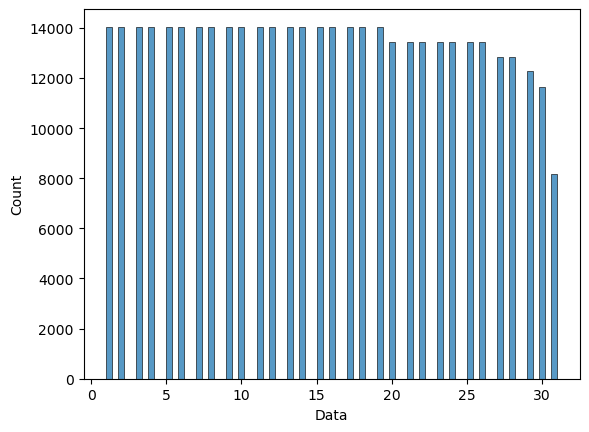

In [7]:
# Conferindo a distribuição de dias
dia = df['Data'].dt.day
sns.histplot(data = df, x = dia)

### Explorando os dados de Ramo

In [8]:
df['Ramo'].value_counts()

SERVIÇOS                       46267
MINERAISNÃO-METÁLICOS          44621
ALIMENTÍCIOS                   38326
MANUFATURADOSDIVERSOS          32744
QUÍMICOS                       30055
METALURGIAEPRODUTOSDEMETAL     29126
COMÉRCIO                       27547
BEBIDAS                        26382
MADEIRAPAPELECELULOSE          24364
TÊXTEIS                        24255
TELECOMUNICAÇÕES               19643
ACR                            18616
VEÍCULOS                       18169
EXTRAÇÃODEMINERAISMETÁLICOS    14821
SANEAMENTO                     12513
TRANSPORTE                     11162
Name: Ramo, dtype: int64

In [9]:
# Padronizando a formatação
df['Ramo'] = df['Ramo'].str.capitalize()

# Corrigindo a formatação de palavras que estão agrupadas
df['Ramo'] = df['Ramo'].replace({'Extraçãodemineraismetálicos':'Extração de minerais metálicos',
                                'Madeirapapelecelulose':'Madeira, papel e celulose',
                                'Manufaturadosdiversos':'Manufaturados diversos',
                                'Metalurgiaeprodutosdemetal':'Metalurgia e produtos de metal',
                                'Mineraisnão-metálicos':'Minerais não-metálicos'})

df['Ramo'].value_counts()

Serviços                          46267
Minerais não-metálicos            44621
Alimentícios                      38326
Manufaturados diversos            32744
Químicos                          30055
Metalurgia e produtos de metal    29126
Comércio                          27547
Bebidas                           26382
Madeira, papel e celulose         24364
Têxteis                           24255
Telecomunicações                  19643
Acr                               18616
Veículos                          18169
Extração de minerais metálicos    14821
Saneamento                        12513
Transporte                        11162
Name: Ramo, dtype: int64

### Explorando os dados de covid por ramo

In [10]:
df['Covid'].groupby(df['Ramo']).sum()

Ramo
Acr                               2262
Alimentícios                      4959
Bebidas                           3356
Comércio                          3480
Extração de minerais metálicos    1895
Madeira, papel e celulose         3045
Manufaturados diversos            4263
Metalurgia e produtos de metal    3908
Minerais não-metálicos            5728
Químicos                          3828
Saneamento                        1995
Serviços                          5990
Telecomunicações                  2523
Transporte                        1566
Têxteis                           3219
Veículos                          2436
Name: Covid, dtype: int64

### Explorando os dados do submercado

In [11]:
df['Submercado'].value_counts()

SUDESTE/CENTRO-OESTE    182879
NORDESTE                109767
SUL                      69647
NORTE                    56318
Name: Submercado, dtype: int64

In [12]:
# Corrigindo a formatação
df['Submercado'] = df['Submercado'].str.title()

df['Submercado'].value_counts()

Sudeste/Centro-Oeste    182879
Nordeste                109767
Sul                      69647
Norte                    56318
Name: Submercado, dtype: int64

In [13]:
# Identificando os valores únicos de UF
df['UF'].unique()

array(['PE\xa0', 'MG', 'MT', 'SC', 'RS', 'SP', 'RJ', 'PA', 'MA', 'ES',
       'BA\xa0', 'MS', 'PR', 'CE', 'SE', 'RN', 'PB', 'AL\xa0', 'GO',
       'DF\xa0', 'PI', 'TO', 'RO', 'AC', 'AM', 'AP'], dtype=object)

In [14]:
#Corrigindo a codificação para utf-8 manual
df['UF'] = df['UF'].replace({'PE\xa0':'PE',
                            'DF\xa0':'DF',
                            'AL\xa0':'AL',
                            'BA\xa0':'BA'})

# Corrigindo as regiões referentes a UF
sudoeste = ['SP', 'RJ', 'MG', 'ES']
centro_oeste = ['GO', 'MT', 'MS', 'DF']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
norte = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']

df.loc[df['UF'].isin(sudoeste), 'Submercado'] = 'Sudeste'
df.loc[df['UF'].isin(centro_oeste), 'Submercado'] = 'Centro-Oeste'
df.loc[df['UF'].isin(nordeste), 'Submercado'] = 'Nordeste'
df.loc[df['UF'].isin(norte), 'Submercado'] = 'Norte'

In [15]:
df['Submercado'].value_counts()

Nordeste        125066
Sudeste         106639
Sul              69647
Centro-Oeste     64784
Norte            52475
Name: Submercado, dtype: int64

## Extract

In [16]:
df = df.to_csv('CCEE_BR_2.csv', index=False)
df

## Juntando com o dataframe do primeiro ETL

In [18]:
df_1 = pd.read_csv('CCEE_BR_1.csv')
df_2 = pd.read_csv('CCEE_BR_2.csv')
df_3 = pd.concat([df_1, df_2])
df_3.to_csv('CCEE_BR_completo.csv', index = False)